In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your imbalanced data into a Pandas DataFrame
data = pd.read_csv('Chronic_Kidney_disease.csv')
# Drop rows with missing values
data.dropna(inplace=True)

# Clean up column names
data.columns = data.columns.str.strip()  # Remove leading/trailing whitespaces
data.columns = data.columns.str.replace('\t', '')  # Remove '\t' characters

# Check column names after cleaning
print(data.columns)

# Define features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [16]:
X.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,9.5,29,12100,3.7,yes,yes,no,poor,no,yes
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,10.8,32,4500,3.8,yes,yes,no,poor,yes,no
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes


In [17]:
# Display data types and unique values for each column
for column in data.columns:
    print(f"{column}: {data[column].dtype}, Unique Values: {data[column].unique()}")


id: int64, Unique Values: [  3   9  11  14  20  22  27  48  58  71  74  76  84  90  91  92  93 127
 128 130 133 144 147 153 157 159 171 176 181 189 190 196 198 210 212 213
 225 226 229 242 246 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 269 270 271 272 275 277 278 279 281 282 284
 285 286 289 291 292 296 298 299 301 304 305 306 307 308 310 311 313 314
 317 318 320 321 323 325 326 327 329 331 333 335 337 338 339 340 341 342
 343 344 345 347 348 351 352 353 354 355 356 357 358 359 360 361 362 364
 366 367 368 369 370 371 372 373 374 375 376 377 379 380 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399]
age: float64, Unique Values: [48. 53. 63. 68. 61. 69. 73. 46. 56. 59. 71. 52. 50. 70. 60. 55. 62. 83.
 21. 45. 64.  6. 49. 40. 23. 57. 51. 34. 38. 42. 35. 30. 25. 24. 20. 33.
 66. 47. 41. 44. 43. 39. 58. 65. 32. 37. 22. 29. 74. 75. 28. 72. 79. 80.
 15. 36. 12. 17.]
bp: float64, Unique Values: [ 70.  90.  80.  60. 100.  50. 110.]
s

In [18]:
y.head()

3     ckd
9     ckd
11    ckd
14    ckd
20    ckd
Name: classification, dtype: object

In [19]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    object 


      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo  pcv  \
383  80.0  80.0  1.025  0.0  0.0    1   1    0   0  119.0  ...  13.9   49   
76   48.0  80.0  1.005  4.0  0.0    0   0    0   1  133.0  ...  10.3   36   
299  73.0  60.0  1.020  0.0  0.0    1   1    0   0  127.0  ...  15.1   52   
279  24.0  70.0  1.025  0.0  0.0    1   1    0   0  140.0  ...  16.3   48   
361  29.0  80.0  1.020  0.0  0.0    1   1    0   0   70.0  ...  13.7   54   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...  ...   
284  33.0  80.0  1.025  0.0  0.0    1   1    0   0  100.0  ...  16.9   52   
341  63.0  70.0  1.025  0.0  0.0    1   1    0   0  130.0  ...  13.4   41   
91   56.0  70.0  1.015  4.0  1.0    0   1    0   0  210.0  ...  16.1   52   
320  57.0  60.0  1.020  0.0  0.0    1   1    0   0  105.0  ...  15.7   44   
337  44.0  70.0  1.025  0.0  0.0    1   1    0   0   92.0  ...  14.0   52   

         wc   rc  htn dm cad appet  pe  ane  
383    5100  5.0    0  0   0 

c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


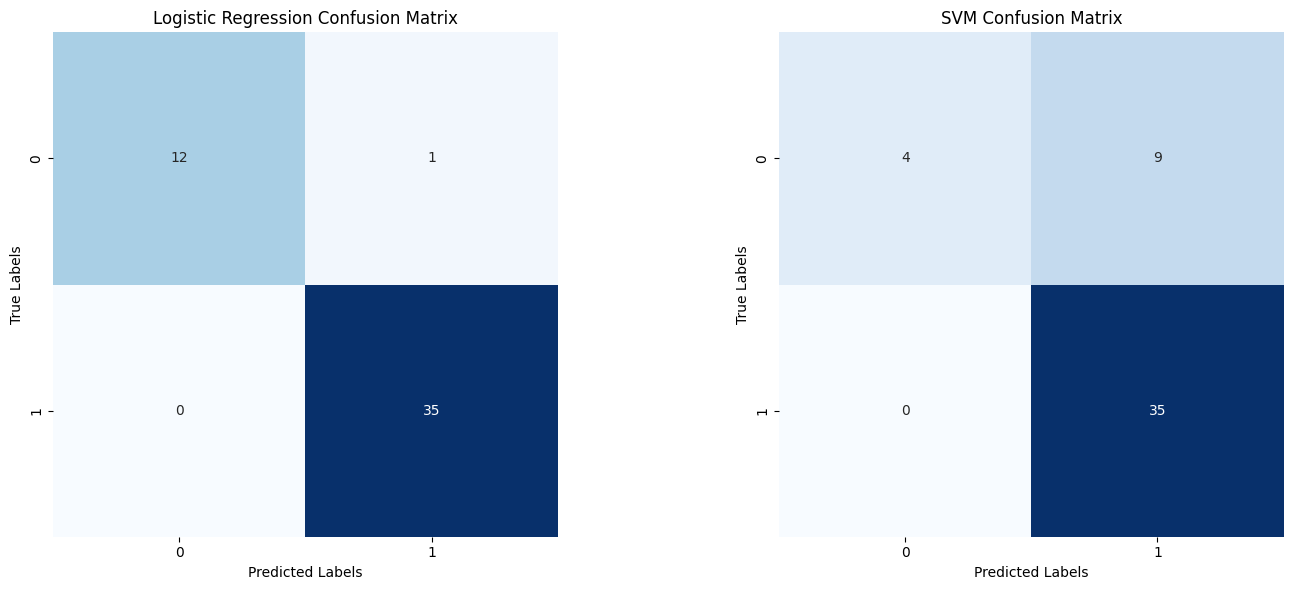

: 

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# List of binary categorical columns
binary_categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Apply label encoding to each binary categorical column
for column in binary_categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Define features and target variable
X = data.drop(['classification','id'], axis=1)
y = data['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
# Define classifiers
logistic_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
import joblib
# Train and evaluate Logistic Regression
logistic_classifier.fit(X_train, y_train)
joblib.dump(logistic_classifier, 'chronic_model.sav')
y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic, recall_logistic, f1_logistic, _ = precision_recall_fscore_support(y_test, y_pred_logistic, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("\nLogistic Regression Test Results:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1-Score: {f1_logistic}")
print("Confusion Matrix:\n", conf_matrix_logistic)

# Train and evaluate SVM
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Test Results:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print("Confusion Matrix:\n", conf_matrix_svm)

# Plot confusion matrices
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()
